# Data analytics

## Bayesian basics

### dr hab. inż. Jerzy Baranowski, Prof. AGH

## Bayes' rule
In most applicatations we focus on the numerator

$$ \underbrace{p(\theta|y)}_{\mathrm{posterior}}\propto 
\underbrace{p(\theta)}_{\mathrm{prior}}
\underbrace{p(y|\theta)}_{\mathrm{likelihood}}$$


## Predictions

### Prior predictive distribution

What values of data can we expect before actual measurements (based on prior knowledge)

$$
p(y)=\int p(y,\theta) d\theta=\int p(\theta)p(y|\theta)d\theta
$$

## Predictions

### Posterior predictive distribution

What values of new data can we expect based on previous measurements and prior knowledge

$$
p(\tilde{y}|y)=\int p(\tilde{y},\theta|y) d\theta=
\int p(\tilde{y}|\theta,y) p(\theta|y)d\theta=
\int p(\tilde{y}|\theta) p(\theta|y)d\theta
$$

## Additional notation and properties
### Everything is conditional
$$p(\theta,y|H)=p(\theta|H)p(y|\theta,H)$$

### Expectation
$$ \mathrm{E}(u)=\int up(u) d u $$

### Variance
$$ \mathrm{var}(u)=\int(u-\mathrm{E}(u))(u-\mathrm{E}(u))^T p(u) du$$

## Conditional expectations and variances
### Expectation of conditional distribution
$$ \mathrm{E}(u)=\mathrm{E}(\mathrm{E}(u|v)) $$
$$ \mathrm{E}(u)=\iint u p(u,v) du dv =\iint u p(u|v) du p(v) dv=\int  \mathrm{E}(u|v)p(v)d v $$
### Variance of conditional distribution
$$ \mathrm{var}(u)=\mathrm{E}(\mathrm{var}(u|v))+\mathrm{var}(\mathrm{E}(u|v) $$

## Changing variables
$$ v=f(u) $$
### Discrete distributions
$$
p_v(v)=p_u(f^{-1}(v))
$$

## Continuous distributions
$$
p_v(v)=|J|p_u(f^{-1}(v))
$$

## Typical variable changes
It is useful to work on the unbounded interval i.e. $(-\infty,\infty)$. Often parameters are bounded, so we use transformations

- Logarithmic (from $(0,\infty)\rightarrow (-\infty,\infty)$)
$$ v=\log(u)$$
- Logistic (from $(0,1)\rightarrow (-\infty,\infty)$)
$$ v=\mathrm{logit}(u) $$
where 
$$ \mathrm{logit}(x)=\log\left(\frac{x}{1-x}\right),\quad
\mathrm{logit}^{-1}(y)=\frac{\exp(y)}{1+\exp(y)}$$

- Probit (from $(0,1)\rightarrow (-\infty,\infty)$)
$$ v=\Phi^{-1}(u) $$
where $\phi$ is the standard normal cumulative distribution function

## Single parameter models
### Building blocks of more complicated models
### Answers to basic questions e.g.:
- What is the average difference between treatment groups?
- How strong is the association between a treatment and an outcome?
- Does the effect of the treatment depend upon a covariate?
- How much variation is there among groups?

## Binomial model

- Natural model for data that arise from a sequence of $n$ exchangeable trials 
- Two possible outcomes, conventionally labeled ‘success’ and ‘failure.’
$$
p(y|\theta)=\mathrm{Bin}(y|n,\theta)={n \choose y}\theta^y (1-\theta)^{n-y}
$$


## Example of Bayesian learning
Globe tossing:
- The true proportion of water covering the globe is p.
- A single toss of the globe has a probability $p$ of producing a water (W) observation.
- It has a probability $1 − p$ of producing a land (L) observation. 
- Each toss of the globe is independent of the others.

## Globe tossing likelyhood

In [2]:
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
theta=np.linspace(0,1,200)
sns.set(style='darkgrid')

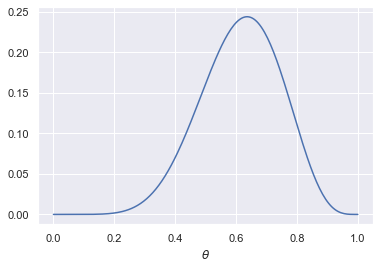

In [3]:
y=7
n=11
likelihood = stats.binom.pmf(y, n, theta)
plt.plot(theta,likelihood)
plt.xlabel(r'$\theta$')
plt.show()

## How does it look analytically?
Posterior distribution with uniform prior takes form
$$ p(\theta|y)\propto \theta^y (1-\theta)^{n-y}$$
Which has form of Beta distribution
$$ \theta|y\sim \mathrm{Beta} (y+1,n-y+1)$$

## How to summarize posterior?
- Ideally – by itself
- Usually – mean, median, mode
- Variation – standard deviation, the interquartile range, and other quantiles

## Interval summaries
- Central interval - a symmetric interval around for example a mean
- Highest posterior density region - smallest interval containing the desired probability

<img src="img/intervals.png" width="500">


## Priors
- **population interpretation**, the prior distribution represents a population of possible parameter values, from which the $\theta$ of current interest has been drawn
- **state of knowledge interpretation**, we must express our knowledge (and uncertainty) about $\theta$ as if its value could be thought of as a random realization from the prior distribution

## Informative priors
- They try to introduce new information
- Often interpreted as knowledge from previous experiments
- For binomial example
$$ p(\theta)\propto \theta^{\alpha-1}(1-\theta)^{\beta-1}$$
It’s a Beta distribution $\theta \sim \mathrm{Beta}(\alpha, \beta)$, prior density is equivalent to $\alpha − 1$ prior successes and $\beta − 1$ prior failures.

## Posterior with informative prior
Posterior has a closed form
$$
\begin{aligned}
p(\theta|y)\propto{}& \theta^{y}(1-\theta)^{n-y}\theta^{\alpha-1}(1-\theta)^{\beta-1}=\\
={}&\theta^{y+\alpha-1}(1-\theta)^{n-y+\beta-1}=\\
={}&\mathrm{Beta}(\alpha+y,\beta+n-y)
\end{aligned}
$$
With expectation
$$
\mathrm{E}(\theta|y)=\frac{\alpha+y}{\alpha+\beta+n}
$$
which always lies between the sample proportion, $y/n$, and the prior mean, $\alpha/(\alpha + \beta)$

## Conjugacy
$$ p(\theta|y)\in\mathcal{P}\mathrm{for\ all}\ p(\cdot|\theta)\in\mathcal{F}\ \mathrm{and}\ p(\cdot)\in\mathcal{P}
$$

Class $\mathcal{P}$ is conjugate to class $\mathcal{F}$

- Conjugacy makes everything easier, formulas are analytic so computation is faster
- It should not be a goal by itself, as sometimes different distributions are much more justified

## Example - biology

Is proportion of girls born with placenta previa lower than the proportion of female births in general population i.e. 0.485?

Study results: of 980 births with PP 437 were female.
<img src="img/placenta.png" width="400">


## Uniform prior
Assuming uniform prior the analytic computation gives us posterior Beta(438,544). We can compute values analytically but its easier via sampling

In [4]:
import arviz as az
samples=np.random.beta(438,544,10000)
interval=az.hpd(samples,0.94) 

print('94% HPD interval:'+str(interval))
print('Median:'+str(np.median(samples)))

94% HPD interval:[0.41611272 0.4749719 ]
Median:0.44615484211634593


### Visualisation

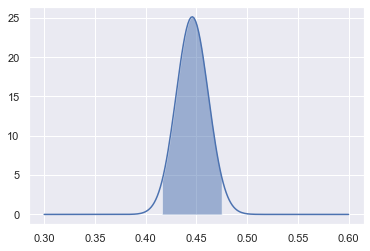

In [5]:

theta1=np.linspace(0.3,0.6,200)
theta2=np.linspace(interval[0],interval[1],200)
bd=stats.beta.pdf(theta1,438,544)
bd2=stats.beta.pdf(theta2,438,544)

fig, ax = plt.subplots()
ax.plot(theta1,bd)
ax.fill_between(theta2, bd2, alpha=0.5)
plt.show()

In [ ]:
fig

## Conjugate priors

For binomial likelihood Beta is its conjugate. We can encode our knowledge (mean value of whole population) using the following relationships:

- mean of $\mathrm{Beta}(\alpha,\beta)$ distribution is $\frac{\alpha}{\alpha+\beta}$
- interpreting Beta, as previous binomial experiments then $\alpha+\beta$ is the population size
- we can try to do computation using various population sizes keeping mean of $0.485$

In [6]:
sizes=[2, 5, 10, 20, 100, 200, 1000]
post_median=[]
post_hpd=[]
alphas=[]
betas=[]
for n in sizes:
    alpha=0.485*n
    beta=n-alpha
    alphas.append(alpha)
    betas.append(beta)
    post_samples=np.random.beta(438+alpha,544+beta,1000)
    post_median.append(np.median(post_samples))
    post_hpd.append(az.hpd(post_samples,0.94))


In [7]:
import pandas as pd
df=pd.DataFrame({'Population size':sizes,
                 'Posterior median':post_median,
                 'Posterior 94% credible interval':post_hpd})

In [8]:
df.head(7)

,Population size,Posterior median,Posterior 94% credible interval
0,2,0.446368,"[0.41679281298646537, 0.47460237511014164]"
1,5,0.446616,"[0.4184036149584743, 0.4769389346339034]"
2,10,0.446609,"[0.41624532683324106, 0.4756884900393527]"
3,20,0.446927,"[0.4145522285906734, 0.4764178779778129]"
4,100,0.449386,"[0.4235168697725932, 0.47863136518905064]"
5,200,0.452534,"[0.427656590939683, 0.48085627355032634]"
6,1000,0.465320,"[0.44143753065777935, 0.4863736794886165]"


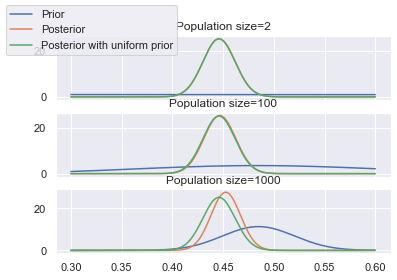

In [9]:
f, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(theta1,stats.beta.pdf(theta1,alphas[0],betas[0]),theta1, stats.beta.pdf(theta1,438+alphas[0],544+betas[0]),theta1, stats.beta.pdf(theta1,438,544))
ax1.set_title('Population size='+str(sizes[0]))
ax2.plot(theta1,stats.beta.pdf(theta1,alphas[3],betas[3]),theta1, stats.beta.pdf(theta1,438+alphas[3],544+betas[3]),theta1, stats.beta.pdf(theta1,438,544))
ax2.set_title('Population size='+str(sizes[4]))
ax3.plot(theta1,stats.beta.pdf(theta1,alphas[5],betas[5]),theta1, stats.beta.pdf(theta1,438+alphas[5],544+betas[5]),theta1, stats.beta.pdf(theta1,438,544))
ax3.set_title('Population size='+str(sizes[6]))
f.legend(['Prior','Posterior','Posterior with uniform prior'],loc=2)

In [ ]:
f

## Non-conjugate prior


Text(0.5, 1.0, 'Non-conjugate posterior')

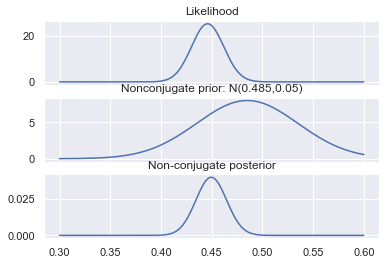

In [10]:
f2, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(theta1, stats.beta.pdf(theta1,438,544))
ax1.set_title('Likelihood')
ax2.plot(theta1,stats.norm.pdf(theta1,0.485,0.05))
ax2.set_title('Nonconjugate prior: N(0.485,0.05)')
post=stats.beta.pdf(theta1,438,544)*stats.norm.pdf(theta1,0.485,0.05)
post=post/np.sum(post)
ax3.plot(theta1, post)
ax3.set_title('Non-conjugate posterior')


In [ ]:
f2

## Interlude - How we can analyze posteriors?
- Grid approximation
- Quadratic approximation (Laplace approximation)
- MCMC
- Variational inference

## Grid approximation
1. Define the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.
2. Compute the value of the prior at each parameter value on the grid.
3. Compute the likelihood at each parameter value.
4. Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood.
5. Finally, standardize the posterior, by dividing each value by the sum of all values.

In [11]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
   
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [12]:
posterior_grid_approx()

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.        , 0.02129338, 0.40378549, 0.57492114, 0.        ]))

## Grid approximation example

Text(0, 0.5, 'posterior probability')

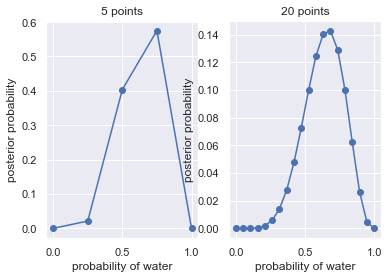

In [13]:
f3, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
grid5=posterior_grid_approx()
grid20=posterior_grid_approx(20)
ax1.plot(grid5[0],grid5[1],marker='o')
ax1.set_title('5 points')
ax1.set_xlabel('probability of water')
ax1.set_ylabel('posterior probability')
ax2.plot(grid20[0],grid20[1],marker='o')
ax2.set_title('20 points')
ax2.set_xlabel('probability of water')
ax2.set_ylabel('posterior probability')



In [ ]:
f3

## Noninformative priors
Proper and improper priors:
- In general, we call a prior density p(θ) proper if it does not depend on data and integrates to 1. 
- In certain cases improper priors can lead to proper posteriors

## Determining noninformative priors
Jeffrey’s rule:

$$p(\theta)\propto J(\theta)^{1/2}$$

$$ J(\theta)=\mathrm{E}\left(
    \left.
        \left(\frac{d\log p(y|\theta)}{d \theta}\right)^2\right|\theta\right)$$

NIP for location parameter
$$
p(\theta)\propto\mathrm{constant}
$$

NIP for scale parameter
$$
p(\theta)\propto\frac{1}{\theta},\quad p(\log \theta)\propto 1
$$

## Weakly informative priors
We characterize a prior distribution as weakly informative if it is proper but is set up so that the information it does provide is intentionally weaker than whatever actual prior knowledge is available. 
- Make uninformative more complicated
- Make informative less complicated

## Summarizing by sampling
- The easiest way to get information about even complicated posteriors is to simulate data that correspond to it and get parameter estimates from sampling.
- For single parameter problems the easiest way is to use inverse cumulative distribution function 
- Grid approximation is more universal

In [14]:
def posterior_grid_approx(grid_points=5, success=7, tosses=11,prior_sel=1):
    
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    if prior_sel==1:
        prior = np.repeat(5, grid_points)  # uniform
    elif prior_sel==2:
        prior = (p_grid >= 0.5).astype(int)  # truncated
    elif prior_sel==3:    
        prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp
    else:
        raise ValueError('Unsuported prior selection')
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

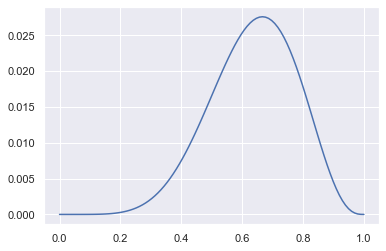

In [15]:
p_grid, posterior=posterior_grid_approx(100,6,9,1)
plt.plot(p_grid, posterior)

## Sampling from grid posterior

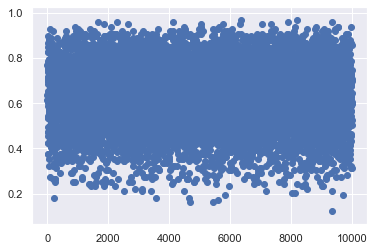

In [16]:
samples=np.random.choice(p_grid,size=10000,replace=True,p=posterior)
plt.scatter(range(10000),samples)

(array([   3.,    8.,   27.,   62.,   89.,  208.,  294.,  454.,  566.,
         715., 1155., 1024., 1155., 1118.,  967., 1041.,  554.,  350.,
         170.,   40.]),
 array([0.12121212, 0.16363636, 0.20606061, 0.24848485, 0.29090909,
        0.33333333, 0.37575758, 0.41818182, 0.46060606, 0.5030303 ,
        0.54545455, 0.58787879, 0.63030303, 0.67272727, 0.71515152,
        0.75757576, 0.8       , 0.84242424, 0.88484848, 0.92727273,
        0.96969697]),
 <a list of 20 Patch objects>)

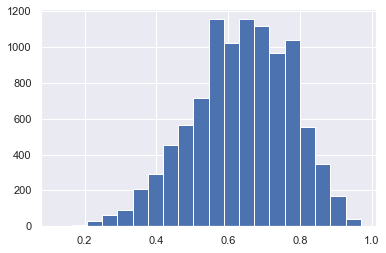

In [17]:
plt.hist(samples,bins=20)

In [18]:
# posterior probability where p < 0.5
print(np.sum( posterior[ p_grid < 0.5 ] ))

0.17183313110747475


In [19]:
# same by sampling
print(np.sum( samples < 0.5 ) / 1e4)

0.1711


In [20]:
# intervals of interest
print(np.sum( (samples > 0.5) & (samples < 0.75) ) / 1e4)

0.6134


In [21]:
# quantiles
np.quantile(samples, [0.1,0.9])

array([0.44444444, 0.80808081])

## Prior predictive distribution

In [22]:
p_grid, posterior=posterior_grid_approx(100,0,0,3)
pr_samples=np.random.choice(p_grid,size=10000,replace=True,p=posterior)
pr_pr_d_samples=np.random.binomial(1,pr_samples)
np.sum(pr_pr_d_samples)/1e4

0.4978

## Posterior predictive distribution

In [23]:
p_grid, posterior=posterior_grid_approx(100,7,11,3)
post_samples=np.random.choice(p_grid,size=10000,replace=True,p=posterior)
post_pr_d_samples=np.random.binomial(1,post_samples)
np.sum(post_pr_d_samples)/1e4

0.578

In [ ]:
post_pr_d_samples